<a href="https://colab.research.google.com/github/Taeho-Kim-0322/Machine-learning/blob/master/Decision_Tree_%EC%98%88%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn.datasets as d
import pandas as pd

# breast_cancer 데이터 셋 로드
x = d.load_breast_cancer()
cancer = pd.DataFrame(data = x.data, columns = x.feature_names)
cancer['target'] = x.target

cancer.info()
cancer.describe()
cancer.target.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

1    357
0    212
Name: target, dtype: int64

In [ ]:
cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.model_selection as ms

# 트레인 데이터와 테스트 데이터 7:3 비율로 분할
X = cancer.iloc[:,:-1]
y = cancer.iloc[:,-1]

X_train, X_test, y_train, y_test = ms.train_test_split(X, y, 
                                                      test_size = 0.3, random_state = 100)
# DT 객체 생성 및 훈련
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)

# 예측값 저장
y_pred = dt_clf.predict(X_test)

import sklearn.metrics as mt

# 학습결과 평가 

print('Train_Accuracy: ', dt_clf.score(X_train, y_train),'\n')

accuracy = mt.accuracy_score(y_test, y_pred)
recall = mt.recall_score(y_test, y_pred)
precision = mt.precision_score(y_test, y_pred)
f1_score = mt.f1_score(y_test, y_pred)
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Train_Accuracy:  1.0 

Accuracy:  0.95 

Recall:  0.97 

Precision:  0.94 

F1_score:  0.96 

Confusion Matrix: 
 [[63  6]
 [ 3 99]]


In [ ]:
# 교차검증
from sklearn.model_selection import cross_val_score, cross_validate

# 각 폴드의 스코어 
scores = cross_val_score(dt_clf, X, y, cv = 5)
scores

pd.DataFrame(cross_validate(dt_clf, X, y, cv =5))

,fit_time,score_time,test_score
0,0.006642,0.000870,0.912281
1,0.007989,0.000857,0.903509
2,0.008032,0.000868,0.903509
3,0.008277,0.000922,0.938596
4,0.008714,0.000851,0.902655


In [ ]:
print('교차검증 평균: ', scores.mean())

교차검증 평균:  0.9173730787144854


In [ ]:
from sklearn.model_selection import GridSearchCV

# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의

dt_clf = DecisionTreeClassifier(random_state=33)
parameters = {'max_depth': [3, 5, 7],
              'min_samples_split': [3, 5],
              'splitter': ['best', 'random']}

grid_dt = GridSearchCV(dt_clf, # estimator 객체,
                      param_grid = parameters, cv = 5,
                      # n_jobs = -1: 모든 cpu를 사용)
                      )

grid_dt.fit(X_train, y_train)

result = pd.DataFrame(grid_dt.cv_results_['params'])
result['mean_test_score'] = grid_dt.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,max_depth,min_samples_split,splitter,mean_test_score
5,5,3,random,0.932057
7,5,5,random,0.929589
9,7,3,random,0.929589
11,7,5,random,0.922025
4,5,3,best,0.919525
0,3,3,best,0.919494
2,3,5,best,0.919494
8,7,3,best,0.917025
6,5,5,best,0.916962
1,3,3,random,0.909494


In [ ]:
parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 5, 7, 9],
              'min_samples_split': [x for x in range(3, 15,2)],
              'min_samples_leaf': [x for x in range(1, 15,2)],
              'max_features': ['auto', 'sqrt', 'log2'],
              'class_weight': ['balanced', None],
              'splitter': ['best', 'random']}

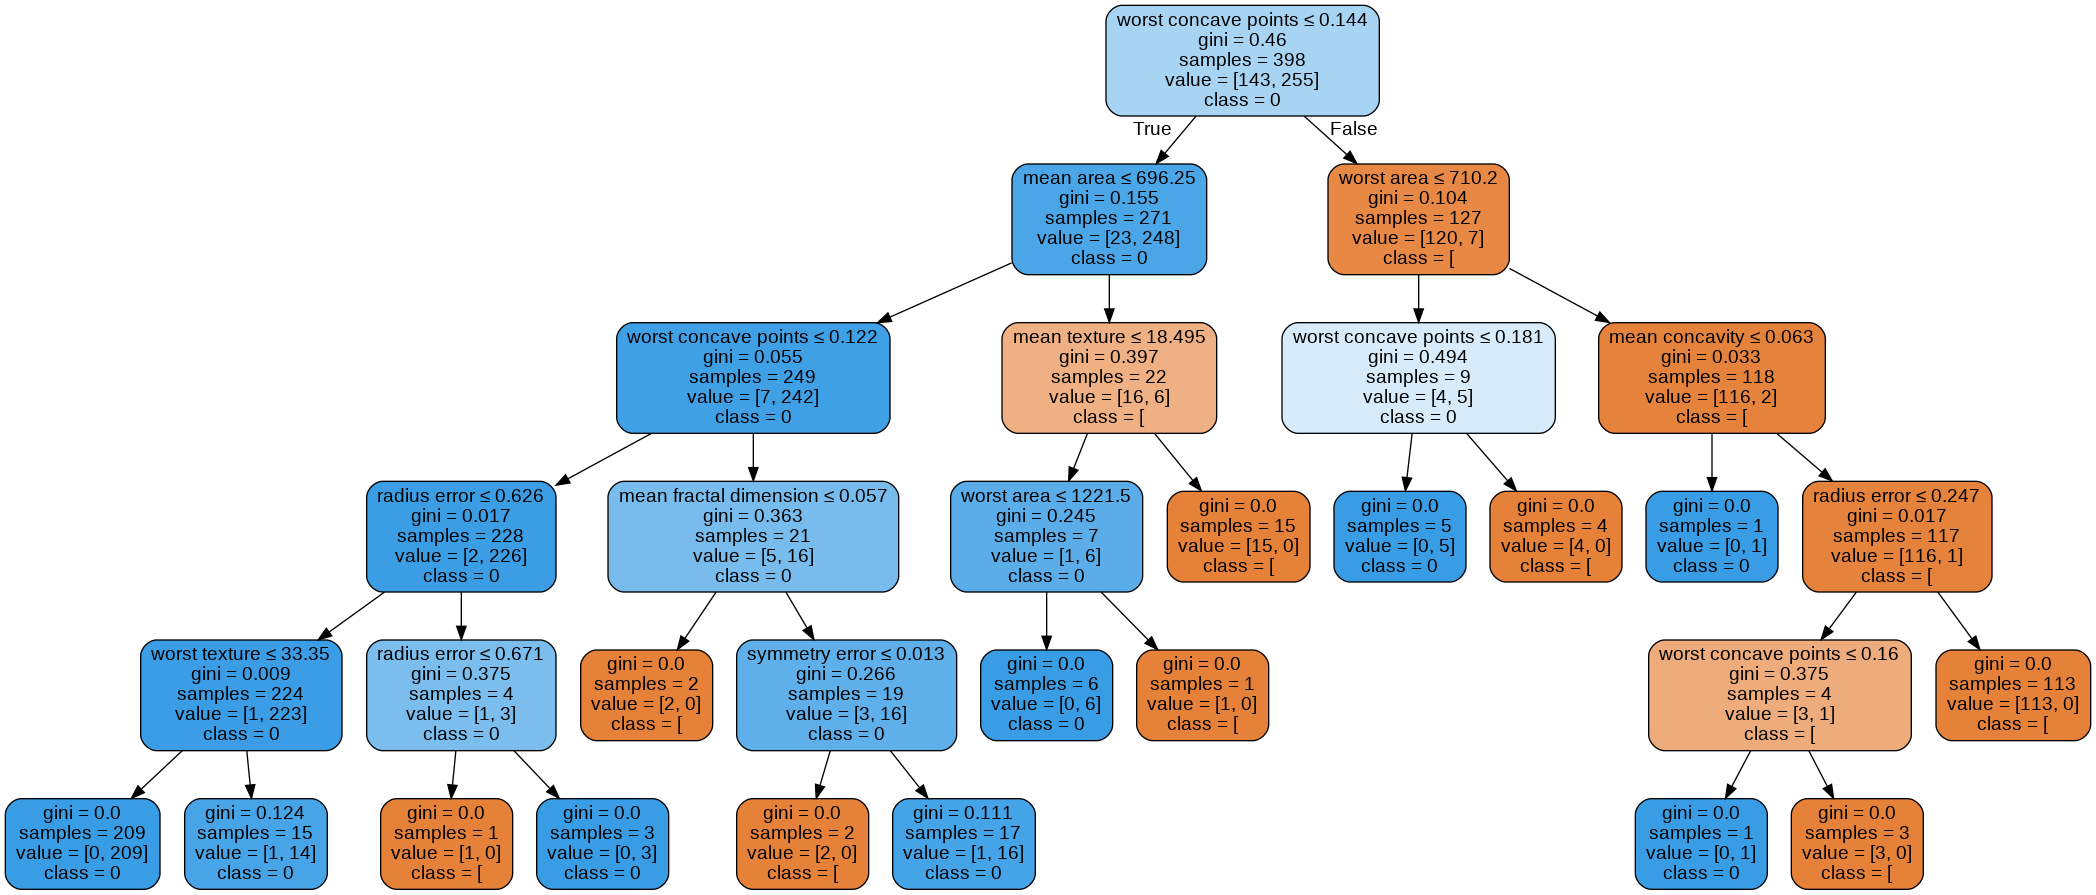

In [ ]:
# 의사결정트리 시각화를 위한 작업
# 트리 시각화를 위한 export_graphviz 모듈 임포트 (이를 위해 graphviz 별도 설치 필요)
from sklearn.tree import export_graphviz
import pydotplus  # graphviz의 dot language 와의 인터페이스를 제공하는 패키지 임포트
from IPython.display import Image  # IPython의 display와 관련된 Public API

x_list = list(X.columns)
y_list = list(y.drop_duplicates(inplace=False))


best_dt = DecisionTreeClassifier(max_depth=5, min_samples_split = 3)
best_dt.fit(X_train, y_train)

# export_graphviz() : 의사결정트리에 대한 graphviz dot data를 생성하는 함수
dot_data = export_graphviz(best_dt, out_file=None, feature_names=x_list,
                          class_names=str(y_list), filled=True, rounded=True, special_characters=True)
# matplotlib.rc('font', family='AppleGothic')
graph = pydotplus.graph_from_dot_data(dot_data)  # graphviz의 dot data로부터 트리 그래프 생성

# 트리 그래프를 위한 png 이미지 생성 및 출력
Image(graph.create_png())